In [1]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

C:\Users\Roshni\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
f='C:/MATLAB/circor-heart-sound/1.0.3/training_data/2530_PV.wav'

librosa_audio, librosa_sample_rate = librosa.load(f)
scipy_sample_rate, scipy_audio = wav.read(f)

print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

Original sample rate: 4000
Librosa sample rate: 22050


In [8]:
import scipy
scipy.std(librosa.feature.zero_crossing_rate(librosa_audio))*10
#0.068522 2530 PV

C:\Users\Roshni\AppData\Local\Temp\ipykernel_21868\4278297965.py:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  scipy.std(librosa.feature.zero_crossing_rate(librosa_audio))*10


0.06955306137953811

In [13]:
f='C:/MATLAB/circor-heart-sound/1.0.3/training_data/2530_AV.wav'

librosa_audio, librosa_sample_rate = librosa.load(f)
scipy_sample_rate, scipy_audio = wav.read(f)

print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

scipy.median(librosa.feature.zero_crossing_rate(librosa_audio))
#0.16889 2530 AV

Original sample rate: 4000
Librosa sample rate: 22050


C:\Users\Roshni\AppData\Local\Temp\ipykernel_21868\4126329686.py:9: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  scipy.median(librosa.feature.zero_crossing_rate(librosa_audio))


0.02734375

In [10]:
print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio), np.max(scipy_audio)))
print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(librosa_audio), np.max(librosa_audio)))

Original audio file min~max range: -32768 to 32767
Librosa audio file min~max range: -1.25 to -1.25


0.024663356293605245

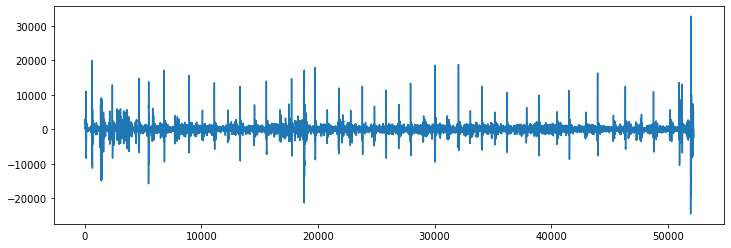

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)
plt.savefig('original_audio.png')

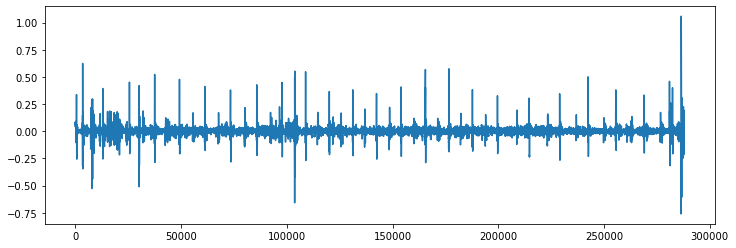

In [10]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio)
plt.savefig('librosa_audio.png')

In [61]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 39)

In [62]:
mfccs

array([[-266.62857  , -298.12747  , -394.5439   , ..., -258.90042  ,
        -297.0399   , -331.05933  ],
       [ 134.71365  ,  176.92987  ,  185.2749   , ...,  301.0582   ,
         272.49014  ,  244.85953  ],
       [  21.12013  ,   42.582363 ,   80.449585 , ...,   62.504814 ,
          75.19269  ,   81.97218  ],
       ...,
       [  -4.1216197,   -4.282524 ,    1.424844 , ...,   -3.32381  ,
          -0.7819836,    0.5061784],
       [  -2.0900288,   -4.363755 ,   -4.316163 , ...,    1.3942353,
           1.2591743,    2.3332338],
       [  -1.6607683,   -6.979208 ,  -10.961235 , ...,    3.061119 ,
           1.5301493,    1.6334959]], dtype=float32)

In [13]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=39)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    return mfccs_processed

In [14]:
mfccsdf=pd.DataFrame(mfccs)
mfccsdf

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
0,-266.628571,-298.127472,-394.543915,-434.320618,-433.591064,-411.732086,-342.731171,-333.494446,-371.228729,-425.015015,...,-387.162445,-401.430206,-394.083374,-368.404785,-354.696838,-350.242462,-271.172150,-258.900421,-297.039886,-331.059326
1,134.713654,176.929871,185.274902,137.747070,138.075287,162.792313,243.583008,255.224365,213.711960,148.062592,...,182.469666,164.243317,171.829193,200.343292,216.155945,217.780701,288.627991,301.058197,272.490143,244.859528
2,21.120131,42.582363,80.449585,51.220547,49.331017,60.558258,103.103317,111.329842,95.744888,56.784454,...,57.209915,43.089165,43.420723,54.522701,62.867096,59.641415,59.584099,62.504814,75.192688,81.972183
3,17.631260,23.372280,13.935366,-1.480229,-6.421355,-6.536810,0.061749,4.712130,10.463524,2.970340,...,-8.633787,-19.155792,-25.966780,-29.970188,-27.294777,-24.559498,-45.617115,-48.179573,-30.525890,-16.199682
4,16.548944,17.797180,12.217251,1.424641,-5.246332,-10.404300,-23.491201,-21.250145,-8.531575,7.731433,...,7.392475,-0.446616,-7.703942,-17.131855,-16.771690,-4.894192,1.508371,-1.083722,-10.041157,-12.814964
5,17.579899,18.965946,28.101955,18.750629,13.197974,6.807794,-10.712933,-9.671524,-0.218750,25.328726,...,32.535133,26.822643,27.324137,21.474724,20.034065,29.755001,50.716949,48.983032,26.782366,14.615043
6,15.177103,14.358845,21.087151,15.206950,12.279680,5.528265,-7.041165,-6.503153,-2.089363,19.819553,...,19.528183,14.188734,23.261950,24.601349,20.327320,19.142172,21.332298,19.335876,11.392532,7.194194
7,18.214943,14.467556,4.929471,2.586346,1.123399,-4.899870,-7.576984,-6.772674,-5.239580,6.560752,...,-1.602686,-8.818464,1.103491,6.828279,1.278300,-4.369673,-16.869137,-18.092083,-12.479242,-10.932682
8,20.374516,17.968904,7.821736,5.683604,4.040373,0.680162,7.120102,9.359093,10.257460,11.668953,...,5.289966,-2.874059,0.952553,3.966253,1.228377,1.600093,-0.356055,0.824865,1.426481,-3.271681
9,15.462584,17.925587,22.435942,18.685543,17.110090,17.226177,25.313759,29.455820,31.883488,26.648581,...,22.485058,18.092098,17.071892,11.888038,13.838888,20.216738,28.839361,31.382944,23.831585,13.710272


In [15]:
mp=extract_features('C:/MATLAB/circor-heart-sound/1.0.3/training_data/2530_PV.wav')

In [16]:
mpdf=pd.DataFrame(mp)

In [17]:
mpdf

,0
0,-403.969208
1,167.619583
2,56.358307
3,-10.391088
4,-3.883083
5,22.497290
6,20.178570
7,1.969729
8,2.455587
9,19.772484


In [24]:
# features = []

# # Iterate through each sound file and extract the features 
# for index, row in metadata.iterrows():
    
#     file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
#     class_label = row["class"]
#     data = extract_features(file_name)
    
#     features.append([data, class_label])

# # Convert into a Panda dataframe 
# featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

In [105]:
import re
file_name = 'C:/MATLAB/circor-heart-sound/1.0.3/training_data/2530_PV.wav'
file_name.rsplit('/',1)[0]
def substring_afterURL(s, delim):
    return s.partition(delim)[2]
def substring_forH(s,delim):
    return s.partition(delim)[2]
file_name = substring_afterURL(file_name, "training_data/")
fn = file_name.split("_")[0]
print(fn)
extra = substring_forH(file_name, "_")
extra.split(".")[0]

2530


'PV'

In [121]:
from pathlib import Path

features=[]
nelist = []
pathlist = Path('C:/MATLAB/circor-heart-sound/1.0.3/training_data/').rglob('*.wav')
for path in pathlist:
    file_name = str(path)
    data = extract_features(file_name)
    print(file_name)
     
    patient = substring_after(file_name, "training_data\\")
    patientID = patient.split("_")[0]
    extra = substring_forH(patient, "_")
    valves = extra.split(".")[0]
    features.append([patientID,valves,data])
        

    

C:\MATLAB\circor-heart-sound\1.0.3\training_data\13918_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\13918_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\13918_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\13918_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\14241_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\14241_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\14241_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\14241_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\14998_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\14998_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\14998_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\14998_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\23625_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\23625_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\23625_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\23625_TV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\49627_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49627_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49627_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49627_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49628_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49628_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49628_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49628_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49630_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49630_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49630_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49630_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49631_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49631_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49638_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49638_MV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\49896_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49896_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49896_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49897_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49897_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49897_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49897_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49900_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49900_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49930_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49930_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49930_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49930_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49931_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49931_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\49931_TV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\50029_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50030_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50030_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50030_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50032_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50032_TV_1.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50032_TV_2.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50034_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50034_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50037_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50037_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50043_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50043_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50043_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50047_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50047_PV.wav
C:\M

C:\MATLAB\circor-heart-sound\1.0.3\training_data\50116_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50116_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50116_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50117_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50117_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50117_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50118_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50118_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50118_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50119_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50121_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50121_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50122_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50122_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50122_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50123_MV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\50225_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50225_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50228_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50228_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50229_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50229_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50229_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50229_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50230_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50230_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50230_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50230_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50231_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50231_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50231_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50231_TV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\50297_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50298_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50298_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50298_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50299_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50299_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50299_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50299_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50300_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50300_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50303_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50303_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50303_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50304_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50306_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50306_MV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\50385_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50385_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50385_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50386_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50386_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50386_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50386_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50388_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50388_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50388_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50388_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50391_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50391_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50391_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50393_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50393_MV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\50687_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50687_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50687_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50688_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50688_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50688_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50688_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50689_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50689_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50689_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50689_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50690_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50690_MV_1.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50690_MV_2.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50690_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50690_TV.wav
C:\M

C:\MATLAB\circor-heart-sound\1.0.3\training_data\50753_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50753_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50753_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50753_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50754_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50754_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50754_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50754_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50756_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50756_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50756_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50756_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50757_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50757_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50757_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50757_TV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\50820_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50822_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50822_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50822_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50822_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50826_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50826_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50826_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50826_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50829_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50829_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\50829_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\51064_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\51331_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\51331_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\51331_PV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\68359_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68359_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68359_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68363_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68363_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68368_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68368_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68368_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68368_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68374_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68374_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68377_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68377_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68377_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68377_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68379_AV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\68560_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68567_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68567_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68567_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68567_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68576_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68576_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68582_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68582_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68582_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68582_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68624_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68624_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68624_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68624_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68632_AV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\68909_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68909_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68909_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68909_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68952_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68952_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68952_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\68952_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\69060_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\69060_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\69060_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\69060_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\69066_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\69066_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\69066_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\69066_TV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\78280_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\78582_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\78582_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\78592_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\78592_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\78592_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\78592_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\80348_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\80348_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\80348_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\80348_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\81035_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\81297_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\81297_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\81297_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\81297_TV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\84738_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84738_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84738_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84740_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84740_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84740_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84740_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84742_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84742_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84742_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84742_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84743_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84743_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84743_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84743_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84746_PV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\84813_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84814_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84814_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84815_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84815_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84815_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84815_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84822_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84822_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84822_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84822_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84823_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84823_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84823_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84823_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84824_AV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\84882_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84883_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84883_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84883_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84883_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84884_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84884_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84884_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84884_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84885_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84885_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84886_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84887_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84887_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84887_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84887_TV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\84962_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84965_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84965_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84965_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84965_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84966_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84966_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84969_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84970_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84970_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84971_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84971_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84971_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84973_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84973_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\84973_PV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\85030_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85031_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85031_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85031_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85031_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85033_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85033_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85033_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85033_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85034_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85034_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85035_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85035_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85035_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85035_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85036_AV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\85105_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85105_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85108_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85108_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85108_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85108_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85109_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85109_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85109_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85109_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85110_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85110_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85110_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85110_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85112_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85112_MV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\85161_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85161_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85161_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85161_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85162_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85162_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85162_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85162_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85163_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85163_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85163_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85163_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85164_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85164_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85164_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85164_TV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\85229_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85229_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85229_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85230_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85230_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85230_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85230_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85234_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85234_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85234_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85234_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85235_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85235_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85235_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85235_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85236_AV.wav
C:\MATLA

C:\MATLAB\circor-heart-sound\1.0.3\training_data\85299_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85299_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85300_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85300_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85301_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85301_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85301_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85301_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85305_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85305_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85305_PV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85305_TV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85306_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85306_MV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85308_AV.wav
C:\MATLAB\circor-heart-sound\1.0.3\training_data\85308_MV.wav
C:\MATLA

In [122]:
DataNeeded=pd.DataFrame(features,columns=['patient','valves','data'])
dff=DataNeeded.data.apply(pd.Series)
dff.insert(0,'patient',DataNeeded['patient'])
dff.insert(1,'valves',DataNeeded['valves']) 

In [123]:
dff

,patient,valves,0,1,2,3,4,5,6,7,...,30,31,32,33,34,35,36,37,38,39
0,13918,AV,-393.428802,189.393295,48.409897,-28.495102,-8.382152,30.831646,24.744322,-4.099710,...,0.434766,2.742999,1.683282,-1.000633,-0.945756,1.339738,1.916809,0.121276,-1.026698,-0.162935
1,13918,MV,-386.781830,175.606888,64.252823,-9.308637,-13.628596,6.484880,6.854814,-4.553491,...,-1.888265,1.264058,2.323116,-0.349153,-2.268649,-0.545204,1.795260,1.203393,-0.991981,-1.494342
2,13918,PV,-385.098175,187.952011,56.223824,-21.681841,-14.450890,13.394370,8.482404,-9.820582,...,-0.828303,2.183489,1.562009,-1.435722,-2.200325,-0.450638,0.456157,-0.294779,-0.485730,0.387496
3,13918,TV,-406.241669,180.785187,45.591118,-28.155884,-8.837893,28.863602,23.155577,-4.504211,...,-0.956247,1.078373,0.143566,-1.939494,-1.517089,0.401791,0.418159,-1.274016,-1.762407,-0.541855
4,14241,AV,-416.316040,206.389694,67.732094,-15.015877,-9.654011,15.008883,4.402667,-18.293966,...,-0.804761,2.509037,2.215362,-0.077887,-0.253173,1.037955,0.542427,-1.253905,-1.269777,0.384904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,9979,TV,-326.800842,180.035233,76.124908,12.121974,15.860209,38.146854,32.283524,8.411316,...,-2.883705,-0.502540,0.901694,-0.531324,-2.020338,-1.301912,-0.098528,-0.641151,-1.892713,-1.644149
3159,9983,AV,-437.573395,228.552444,72.924332,-21.774368,-14.715127,20.891191,17.358702,-9.944026,...,-0.326086,2.358379,1.819248,-0.696565,-0.879632,1.231800,1.959835,0.473899,-0.406667,0.552373
3160,9983,MV,-436.136566,204.902908,65.469193,-16.318693,-6.392537,25.015444,17.401375,-10.244701,...,-0.687463,1.966979,1.315277,-1.068679,-0.983660,1.133723,1.548222,-0.208725,-1.039475,0.190410
3161,9983,PV,-466.193939,230.626312,74.420425,-18.875435,-10.567684,23.287148,16.677166,-10.748337,...,0.595359,3.206362,1.904102,-0.835523,-0.497037,1.794301,1.944898,-0.017335,-0.735262,0.458687


In [46]:
featuresdf = pd.DataFrame(features, columns=['feature'])
df2 = featuresdf

In [55]:
df3 = pd.DataFrame(df2['feature'].to_list())
print (df3)

              0           1          2          3          4          5   \
0    -393.428802  189.393295  48.409897 -28.495102  -8.382152  30.831646   
1    -386.781830  175.606888  64.252823  -9.308637 -13.628596   6.484880   
2    -385.098175  187.952011  56.223824 -21.681841 -14.450890  13.394370   
3    -406.241669  180.785187  45.591118 -28.155884  -8.837893  28.863602   
4    -416.316040  206.389694  67.732094 -15.015877  -9.654011  15.008883   
...          ...         ...        ...        ...        ...        ...   
3158 -326.800842  180.035233  76.124908  12.121974  15.860209  38.146854   
3159 -437.573395  228.552444  72.924332 -21.774368 -14.715127  20.891191   
3160 -436.136566  204.902908  65.469193 -16.318693  -6.392537  25.015444   
3161 -466.193939  230.626312  74.420425 -18.875435 -10.567684  23.287148   
3162 -454.747803  215.098129  62.877213 -23.472198  -8.519814  27.514673   

             6          7          8          9   ...        30        31  \
0     24.7

In [58]:
df3.columns = pd.RangeIndex(1, len(df3.columns)+1) 

In [59]:
df3

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,-393.428802,189.393295,48.409897,-28.495102,-8.382152,30.831646,24.744322,-4.099710,-6.735952,13.613963,...,0.434766,2.742999,1.683282,-1.000633,-0.945756,1.339738,1.916809,0.121276,-1.026698,-0.162935
1,-386.781830,175.606888,64.252823,-9.308637,-13.628596,6.484880,6.854814,-4.553491,-0.718124,14.766309,...,-1.888265,1.264058,2.323116,-0.349153,-2.268649,-0.545204,1.795260,1.203393,-0.991981,-1.494342
2,-385.098175,187.952011,56.223824,-21.681841,-14.450890,13.394370,8.482404,-9.820582,-3.726774,17.725004,...,-0.828303,2.183489,1.562009,-1.435722,-2.200325,-0.450638,0.456157,-0.294779,-0.485730,0.387496
3,-406.241669,180.785187,45.591118,-28.155884,-8.837893,28.863602,23.155577,-4.504211,-7.344366,11.609176,...,-0.956247,1.078373,0.143566,-1.939494,-1.517089,0.401791,0.418159,-1.274016,-1.762407,-0.541855
4,-416.316040,206.389694,67.732094,-15.015877,-9.654011,15.008883,4.402667,-18.293966,-12.085195,12.519819,...,-0.804761,2.509037,2.215362,-0.077887,-0.253173,1.037955,0.542427,-1.253905,-1.269777,0.384904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,-326.800842,180.035233,76.124908,12.121974,15.860209,38.146854,32.283524,8.411316,0.316991,10.875978,...,-2.883705,-0.502540,0.901694,-0.531324,-2.020338,-1.301912,-0.098528,-0.641151,-1.892713,-1.644149
3159,-437.573395,228.552444,72.924332,-21.774368,-14.715127,20.891191,17.358702,-9.944026,-14.659947,3.789721,...,-0.326086,2.358379,1.819248,-0.696565,-0.879632,1.231800,1.959835,0.473899,-0.406667,0.552373
3160,-436.136566,204.902908,65.469193,-16.318693,-6.392537,25.015444,17.401375,-10.244701,-13.233028,6.176984,...,-0.687463,1.966979,1.315277,-1.068679,-0.983660,1.133723,1.548222,-0.208725,-1.039475,0.190410
3161,-466.193939,230.626312,74.420425,-18.875435,-10.567684,23.287148,16.677166,-10.748337,-12.347105,8.281165,...,0.595359,3.206362,1.904102,-0.835523,-0.497037,1.794301,1.944898,-0.017335,-0.735262,0.458687


In [60]:
df3.to_csv('MFCCFeatures.csv')

In [92]:
features

[['',
  'data\\13918_AV',
  array([-3.93428802e+02,  1.89393295e+02,  4.84098969e+01, -2.84951019e+01,
         -8.38215160e+00,  3.08316460e+01,  2.47443218e+01, -4.09970951e+00,
         -6.73595190e+00,  1.36139631e+01,  1.91869564e+01,  2.58771133e+00,
         -8.13905048e+00,  6.49736285e-01,  1.04544992e+01,  5.70033503e+00,
         -3.06399560e+00, -1.46630609e+00,  5.06307697e+00,  4.20258188e+00,
         -1.51532686e+00, -1.32559896e+00,  4.25727177e+00,  5.53294325e+00,
          9.64097261e-01, -1.19233084e+00,  2.24748015e+00,  4.79688549e+00,
          2.25396466e+00, -7.30492711e-01,  4.34765518e-01,  2.74299884e+00,
          1.68328249e+00, -1.00063300e+00, -9.45755839e-01,  1.33973789e+00,
          1.91680920e+00,  1.21276036e-01, -1.02669799e+00, -1.62935004e-01],
        dtype=float32)],
 ['',
  'data\\13918_MV',
  array([-3.8678183e+02,  1.7560689e+02,  6.4252823e+01, -9.3086367e+00,
         -1.3628596e+01,  6.4848800e+00,  6.8548136e+00, -4.5534911e+00,
      

In [124]:
dff.to_csv('MFCCfeatures.csv')

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('MFCCFeatures.csv')

In [8]:
a = df1.valves.unique()

In [10]:
df2 = pd.DataFrame(a)

In [12]:
df2.to_csv("heartvalve_keys.csv")